In [1]:
import backtrader as bt
import alpaca_backtrader_api
import alpaca_trade_api as tradeapi
import pandas as pd

In [2]:
import matplotlib
%matplotlib notebook

In [3]:
is_live = False

In [4]:
ALPACA_API_KEY = 'Insert Your Key'
ALPACA_SECRET_KEY = 'Insert Your key'
ALPACA_PAPER = True

In [5]:
#live
#APCA_API_KEY_ID = xxxxxxxxxxxxxxxxxxxxxxxx
#APCA_API_SECRET_KEY = xxxxxxxxxxxxxxxxxxx

In [6]:
class BaseStrategy_B(bt.SignalStrategy): #EMACROSS
    def __init__(self):
        # omitting a data implies self.datas[0] (aka self.data and self.data0)
        ema1 = bt.ind.EMA(period=20)
        ema2 = bt.ind.EMA(period=50)
        # our entry point
        #self.crossup = bt.ind.CrossUp(fast_ma, slow_ma)
        crossover = bt.ind.CrossOver(ema1, ema2)
        self.signal_add(bt.SIGNAL_LONG, crossover)

In [7]:
class BaseStrategy(bt.SignalStrategy): #SMACROSS
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=30)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)

In [8]:
# class AutoStopOrStopTrail(BaseStrategy):
#     params = dict(
#         stop_loss=0.02,  # price is 2% less than the entry point
#         trail=False,
#         buy_limit=False,
#     )

#     buy_order = None  # default value for a potential buy_order

#     def notify_order(self, order):
#         if order.status == order.Cancelled:
#             print('CANCEL@price: {:.2f} {}'.format(
#                 order.executed.price, 'buy' if order.isbuy() else 'sell'))
#             return

#         if not order.status == order.Completed:
#             return  # discard any other notification

#         if not self.position:  # we left the market
#             print('SELL@price: {:.2f}'.format(order.executed.price))
#             return

#         # We have entered the market
#         print('BUY @price: {:.2f}'.format(order.executed.price))

#     def next(self):
#         if not self.position and self.crossup > 0:
#             if self.buy_order:  # something was pending
#                 self.cancel(self.buy_order)

#             # not in the market and signal triggered
#             if not self.p.buy_limit:
#                 self.buy_order = self.buy(transmit=False)
#             else:
#                 price = self.data.close[0] * (1.0 - self.p.buy_limit)

#                 # transmit = False ... await child order before transmission
#                 self.buy_order = self.buy(price=price, exectype=bt.Order.Limit,
#                                           transmit=False)

#             # Setting parent=buy_order ... sends both together
#             if not self.p.trail:
#                 stop_price = self.data.close[0] * (1.0 - self.p.stop_loss)
#                 self.sell(exectype=bt.Order.Stop, price=stop_price,
#                           parent=self.buy_order)
#             else:
#                 self.sell(exectype=bt.Order.StopTrail,
#                           trailamount=self.p.trail,
#                           parent=self.buy_order)

In [9]:
cerebro = bt.Cerebro()
store = alpaca_backtrader_api.AlpacaStore(
    key_id=ALPACA_API_KEY,
    secret_key=ALPACA_SECRET_KEY,
    paper=ALPACA_PAPER
)

In [10]:
cerebro.addstrategy(BaseStrategy)

cerebro.broker.setcash(10000)
cerebro.broker.setcommission(commission=0.0)
cerebro.addsizer(bt.sizers.PercentSizer, percents=100)

In [11]:
DataFactory = alpaca_backtrader_api.AlpacaData #store.getdata
data0 = DataFactory(
    dataname = 'AAPL',
    timeframe=bt.TimeFrame.TFrame("Minutes"),
    fromdate=pd.Timestamp('2018-1-1'),
    todate=pd.Timestamp('2019-11-15'),
    historical=True)
cerebro.adddata(data0)

Final Portfolio Value: 10084.04


<IPython.core.display.Javascript object>


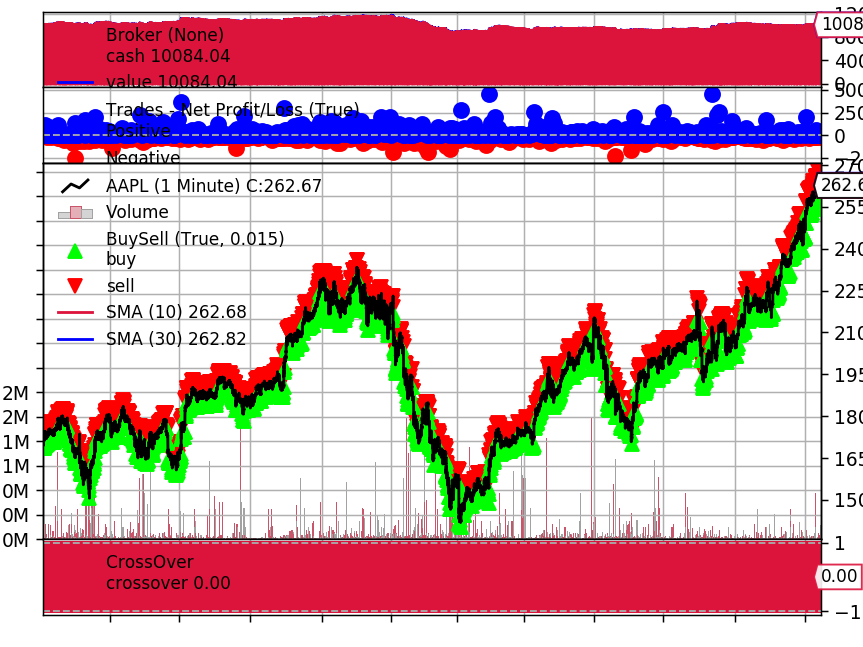

[[<Figure size 640x480 with 5 Axes>]]

In [12]:
#Resample different timeframe just image
#cerebro.resampledata(data0,timeframe=bt.TimeFrame.Minutes,compression=15)
#cerebro.resampledata(data0,timeframe=bt.TimeFrame.Minutes,compression=30)
#cerebro.resampledata(data0,timeframe=bt.TimeFrame.Minutes,compression=60)

cerebro.run()
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
cerebro.plot()
#cerebro.plot(style='candlestick', barup='green', bardown='red')

In [ ]:
# 1.Tturn this to a loop and 
# 2.turn data name to list
# 3. place  cerebro.broker.getvalue() and ticker name in dataframe different sheet per strategy
# 4. maybe cloud algo.

# DataFactory = alpaca_backtrader_api.AlpacaData #store.getdata
# data0 = DataFactory(
#     dataname = 'AAPL',
#     timeframe=bt.TimeFrame.TFrame("Minutes"),
#     fromdate=pd.Timestamp('2018-1-1'),
#     todate=pd.Timestamp('2019-11-15'),
#     historical=True)
# cerebro.adddata(data0)